In [2]:
import pandas as pd
from pathlib import Path

from posydon.popsyn.binarypopulation import BinaryPopulation
from posydon.binary_evol.binarystar import BinaryStar
from posydon.binary_evol.singlestar import SingleStar
from posydon.popsyn.synthetic_population import Population
from posydon.popsyn.synthetic_population import PopulationRunner
import astropy.units as u

import os
import shutil
from posydon.config import PATH_TO_POSYDON
import pandas as pd 

from POSYDONHRDiagramModule import HR_Diagram
import matplotlib.pyplot as plt

In [3]:
cols = ['time', 'step_names', 'state','S1_state', 'S2_state', 'orbital_period', 'event', 'S1_mass', 'S2_mass' ]
finCols = [
    'orbital_period_f',
    'eccentricity_f',
    'state_f',

    'S2_state_f',
    'S2_mass_f',
    'S2_log_R_f',

    'S1_state_f',
    'S1_mass_f',
    'S1_log_R_f'
 ]

initCols = [
    'orbital_period_i',
    'eccentricity_i',
    'state_i',

    'S2_state_i',
    'S2_mass_i',
    'S2_log_R_i',

    'S1_state_i',
    'S1_mass_i',
    'S1_log_R_i'
 ]

In [4]:
oldPop = Population(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis/1e+00_Zsun_OldUCXB_subpop.h5')

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max


In [5]:
oldPopDF = oldPop.oneline.select()

In [6]:
oldUCXBData = pd.read_csv(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/InitResearch/UCXBs.csv')

In [7]:
loadedpop = Population(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis/1e+00_Zsun_UCXB_subpop.h5')

In [8]:
loadedpop.calculate_formation_channels()

Formation channels already exist in the parsed population file!
Channels will be overwriten


In [9]:
loadedpop.formation_channels

,channel_debug,channel
0,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
1,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
2,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
3,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
4,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
...,...,...
575,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
576,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
577,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
578,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END


In [10]:
loadedpop.formation_channels[loadedpop.formation_channels != 'ZAMS_oRLO1_CC1_oRLO2_oCE2_END'].dropna().index.to_list()

[39, 107, 130, 156, 221, 252, 290, 432, 434, 437, 494, 526, 568]

In [11]:
loadedpop.oneline[[39, 107, 130, 156, 221, 252, 290, 432, 434, 437, 494, 526, 568]][finCols]

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S1_state_f,S1_mass_f,S1_log_R_f
binary_index,,,,,,,,,
39,0.031946,0.0,initial_RLOF,stripped_He_non_burning,1.302401,-0.654915,NS,1.283958,-4.745687
107,0.000018,0.0,contact,NS,1.277584,-4.745687,WD,1.261091,-4.745687
130,0.000018,0.0,contact,NS,1.277584,-4.745687,WD,1.257418,-4.745687
156,0.000017,0.0,contact,NS,1.277584,-4.745687,WD,1.342922,-4.745687
221,0.000018,0.0,contact,NS,1.277584,-4.745687,WD,1.188183,-4.745687
252,0.000017,0.0,contact,NS,1.277584,-4.745687,WD,1.336957,-4.745687
290,0.036990,0.0,initial_RLOF,stripped_He_non_burning,1.088233,-0.699949,NS,1.287746,-4.745687
432,0.035383,0.0,initial_RLOF,stripped_He_non_burning,1.123201,-0.691328,NS,1.282977,-4.745687
434,0.000019,0.0,contact,NS,1.277584,-4.745687,WD,1.161731,-4.745687


In [12]:
weird_paths = [[39, 290, 432, 494]]

In [13]:
oldPop.formation_channels


# ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END

,channel_debug,channel
0,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END
1,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END
2,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END
3,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END
4,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END
...,...,...
409,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END
410,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END
411,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END
412,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END


In [14]:
loadedpop.formation_channels
# ZAMS_oRLO1_CC1_oRLO2_oCE2_END

,channel_debug,channel
0,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
1,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
2,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
3,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
4,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
...,...,...
575,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
576,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
577,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
578,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END


In [15]:
UCXB_anypoint = Population('/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis/1e+00_Zsun_UCXB_anypoint_subpop.h5')

In [16]:
UCXBHistory = UCXB_anypoint.history.select()

In [17]:
(120 * u.minute).to(u.day).value

0.08333333333333334

In [18]:
(1 * u.minute).to(u.day).value

0.0006944444444444445

In [19]:
UCXBHistory[((UCXBHistory['orbital_period'] < ((60 * u.minute).to(u.day).value)) & (UCXBHistory['orbital_period'] > ((1 * u.minute).to(u.day).value))) & (UCXBHistory['state'] == 'initial_RLOF') & (UCXBHistory['event'] == 'END')]

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
2,initial_RLOF,END,6.750412e+07,0.032198,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,initial_RLOF,END,6.420867e+07,0.040682,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,initial_RLOF,END,6.626993e+07,0.032443,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,initial_RLOF,END,4.863118e+07,0.034398,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,initial_RLOF,END,4.391797e+07,0.035741,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7598,initial_RLOF,END,6.660901e+07,0.037907,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7604,initial_RLOF,END,7.057322e+07,0.038162,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7610,initial_RLOF,END,4.984255e+07,0.038031,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
UCXB_DF = loadedpop.oneline.select()

In [21]:
UCXB_DF = UCXB_DF[UCXB_DF['orbital_period_f']> .01]

In [22]:
UCXB_DF

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,step_names_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
0,detached,ZAMS,0.0,17.518876,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
1,detached,ZAMS,0.0,21.494727,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
2,detached,ZAMS,0.0,52.526829,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
3,detached,ZAMS,0.0,22.520582,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
4,detached,ZAMS,0.0,35.333872,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,detached,ZAMS,0.0,887.816353,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during postMS,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
576,detached,ZAMS,0.0,21.097349,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0
577,detached,ZAMS,0.0,58.842648,0.0,NaN,NaN,NaN,None,initial_cond,...,unstable_MT,NaN,NaN,Last stable RLOF during stripped He star,Unstable RLOF during postMS,NaN,NaN,0,1,1.0


In [23]:
UCXB_DF[finCols]

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S1_state_f,S1_mass_f,S1_log_R_f
binary_index,,,,,,,,,
0,0.032198,0.0,initial_RLOF,stripped_He_non_burning,1.202888,-0.674162,NS,1.266207,-4.745687
1,0.040682,0.0,initial_RLOF,stripped_He_non_burning,1.285015,-0.666262,NS,1.264298,-4.745687
2,0.051462,0.0,initial_RLOF,stripped_He_non_burning,2.607783,-0.431226,BH,2.775623,-4.928765
3,0.032443,0.0,initial_RLOF,stripped_He_non_burning,1.222433,-0.668492,NS,1.298593,-4.745687
4,0.034398,0.0,initial_RLOF,stripped_He_non_burning,1.778568,-0.584784,NS,1.285577,-4.745687
...,...,...,...,...,...,...,...,...,...
575,0.037907,0.0,initial_RLOF,stripped_He_non_burning,1.215948,-0.675860,NS,1.286555,-4.745687
576,0.038162,0.0,initial_RLOF,stripped_He_non_burning,1.145588,-0.690865,NS,1.264299,-4.745687
577,0.038031,0.0,initial_RLOF,stripped_He_non_burning,1.807839,-0.583320,NS,1.286629,-4.745687


In [24]:
import numpy as np

In [25]:
x = np.log10(UCXB_DF['orbital_period_i'])
y = UCXB_DF['orbital_period_f']

# plt.scatter(x,y)

<Axes: >

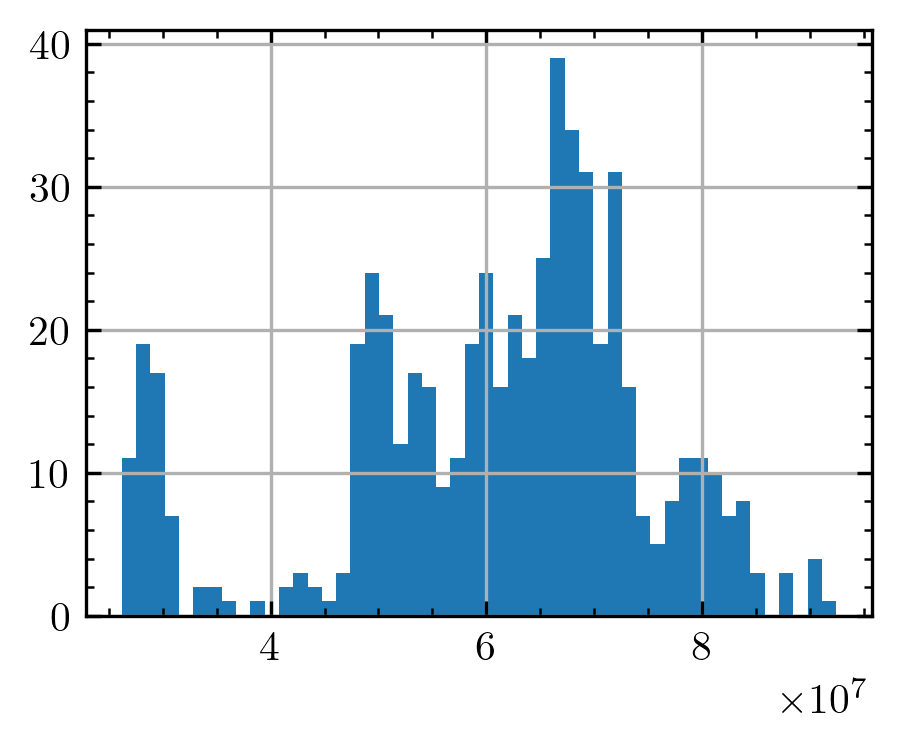

In [26]:
UCXB_DF['time_f'].hist(bins=50)

In [27]:
oldPopDF[finCols].describe()

,orbital_period_f,eccentricity_f,S2_mass_f,S2_log_R_f,S1_mass_f,S1_log_R_f
count,414.000000,414.0,414.000000,414.000000,414.000000,414.000000
mean,0.037694,0.0,0.854189,-0.838528,1.295899,-4.745687
std,0.009268,0.0,0.155229,0.421058,0.098702,0.000000
min,0.007339,0.0,0.516925,-2.295000,1.196033,-4.745687
25%,0.034625,0.0,0.795866,-0.732627,1.196033,-4.745687
50%,0.039589,0.0,0.894513,-0.676084,1.275613,-4.745687
75%,0.043725,0.0,0.996863,-0.652199,1.366403,-4.745687
max,0.050986,0.0,1.006803,-0.633801,1.652616,-4.745687


In [28]:
UCXB_DF.formation_records()

AttributeError: 'DataFrame' object has no attribute 'formation_records'

In [ ]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams['figure.dpi'] = 150


In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# just some chatgpt crap to allow for temp graphing

def scatter(xname, yname, old=False, colorVar='S2_state_f', color=False, df='default', logX = False, logY = False):
    # --- Select DF ---
    if isinstance(df, str):
        df = oldPopDF if old else UCXB_DF

    if logX== False:
        x = df[xname]
    else:
        x = np.log10(df[xname])
    if logY== False:
        y = df[yname]
    else:
        y = np.log10(df[yname])

    # --- Color handling ---
    if color:
        states = df[colorVar]
        unique_states = states.unique()

        # mapping states -> integer categories
        state_to_num = {state: i for i, state in enumerate(unique_states)}
        color_values = states.map(state_to_num)

        fig, ax = plt.subplots()

        # Create scatter WITH capture of scatter object
        sc = ax.scatter(x, y, c=color_values, cmap='plasma', alpha=.6)

        ax.set_xlabel(xname)
        ax.set_ylabel(yname)

        # === FIX: get the exact same colormap & norm from scatter ===
        cmap = sc.cmap
        norm = sc.norm

        # Build legend using same mapping
        handles = [
            mlines.Line2D(
                [], [], marker='o', linestyle='',
                color=cmap(norm(i)),   # EXACT same color as scatter
                label=state
            )
            for i, state in enumerate(unique_states)
        ]

        ax.legend(handles=handles, title=colorVar)

        plt.show()
        return

    # --- No color mode ---
    plt.scatter(x, y)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show()


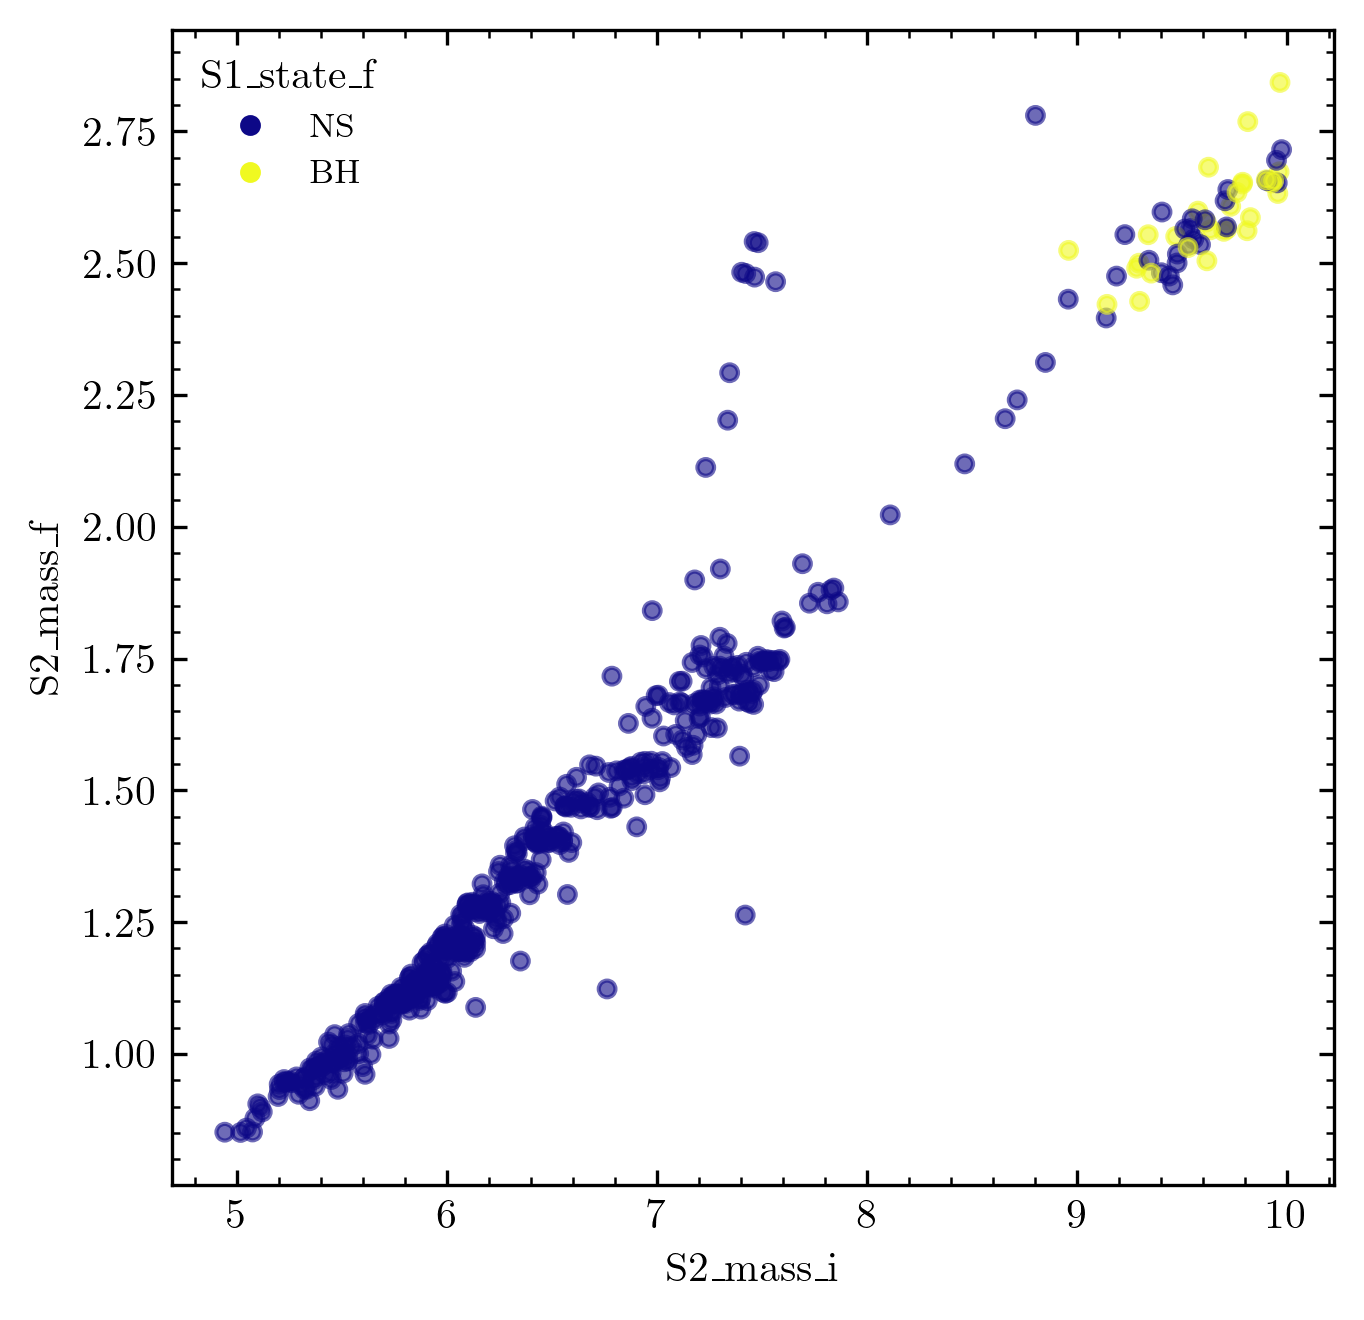

In [ ]:
scatter('S2_mass_i', 'S2_mass_f', old=False, color = True, colorVar='S1_state_f')

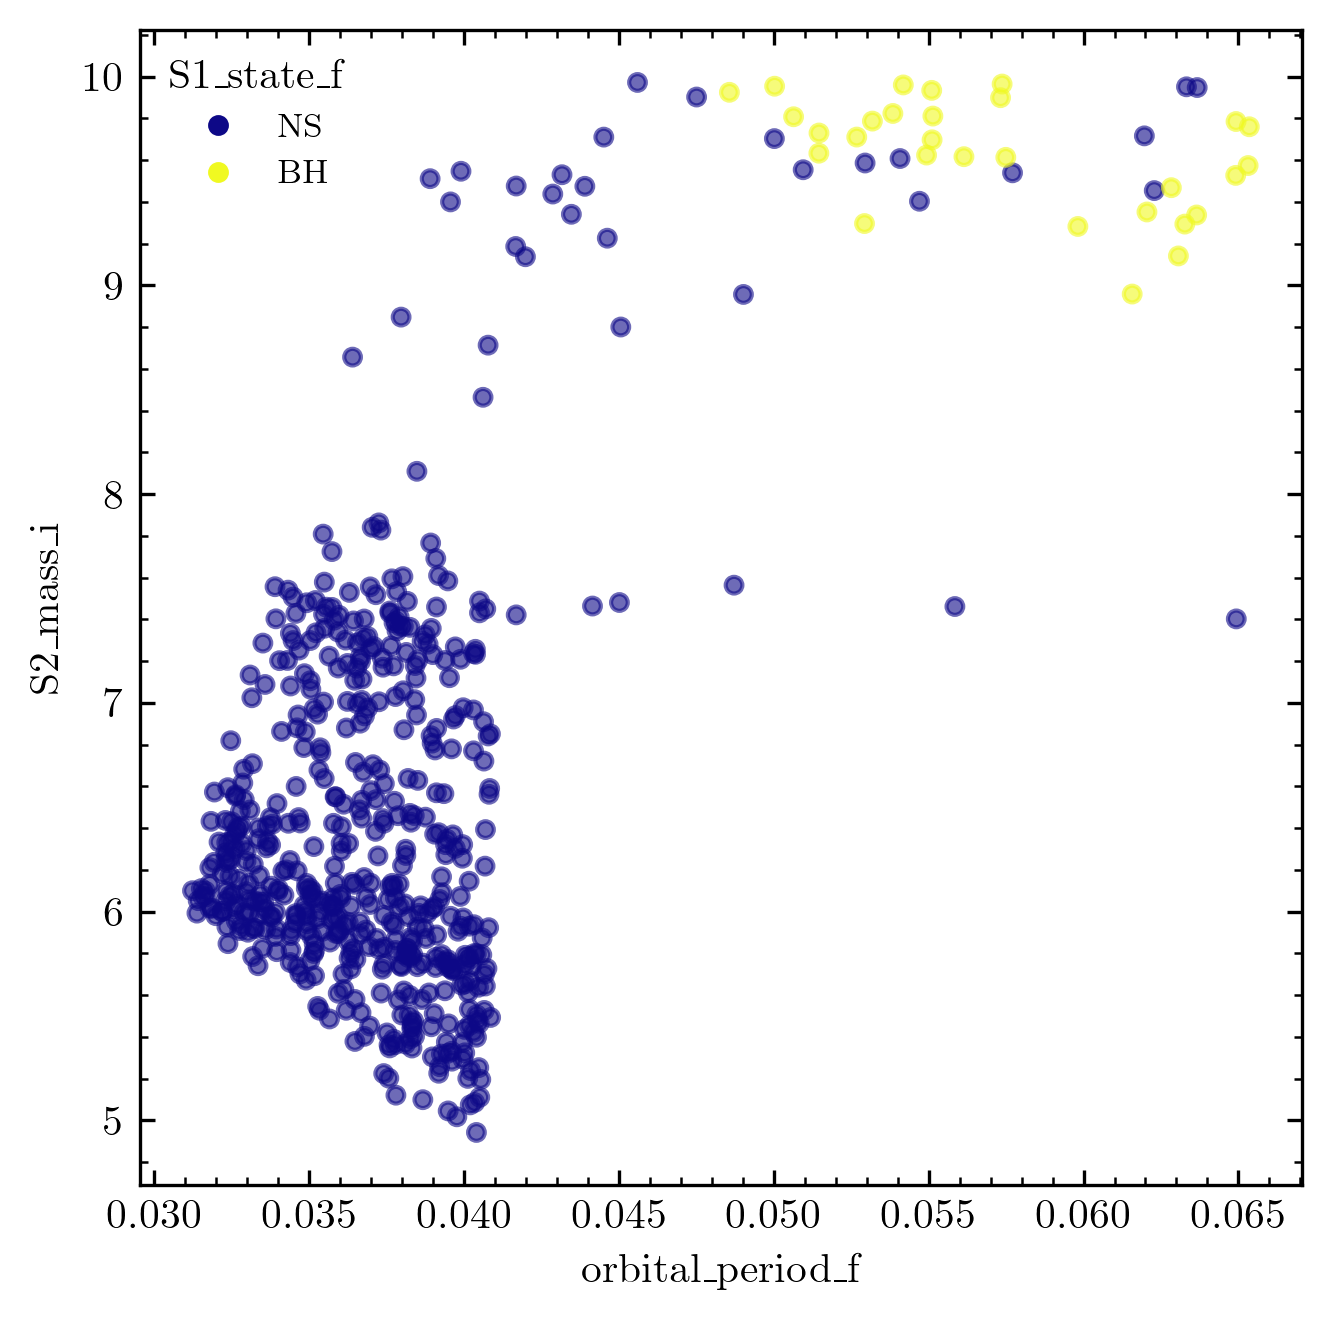

In [ ]:
scatter('orbital_period_f', 'S2_mass_i', color = True, colorVar= 'S1_state_f')

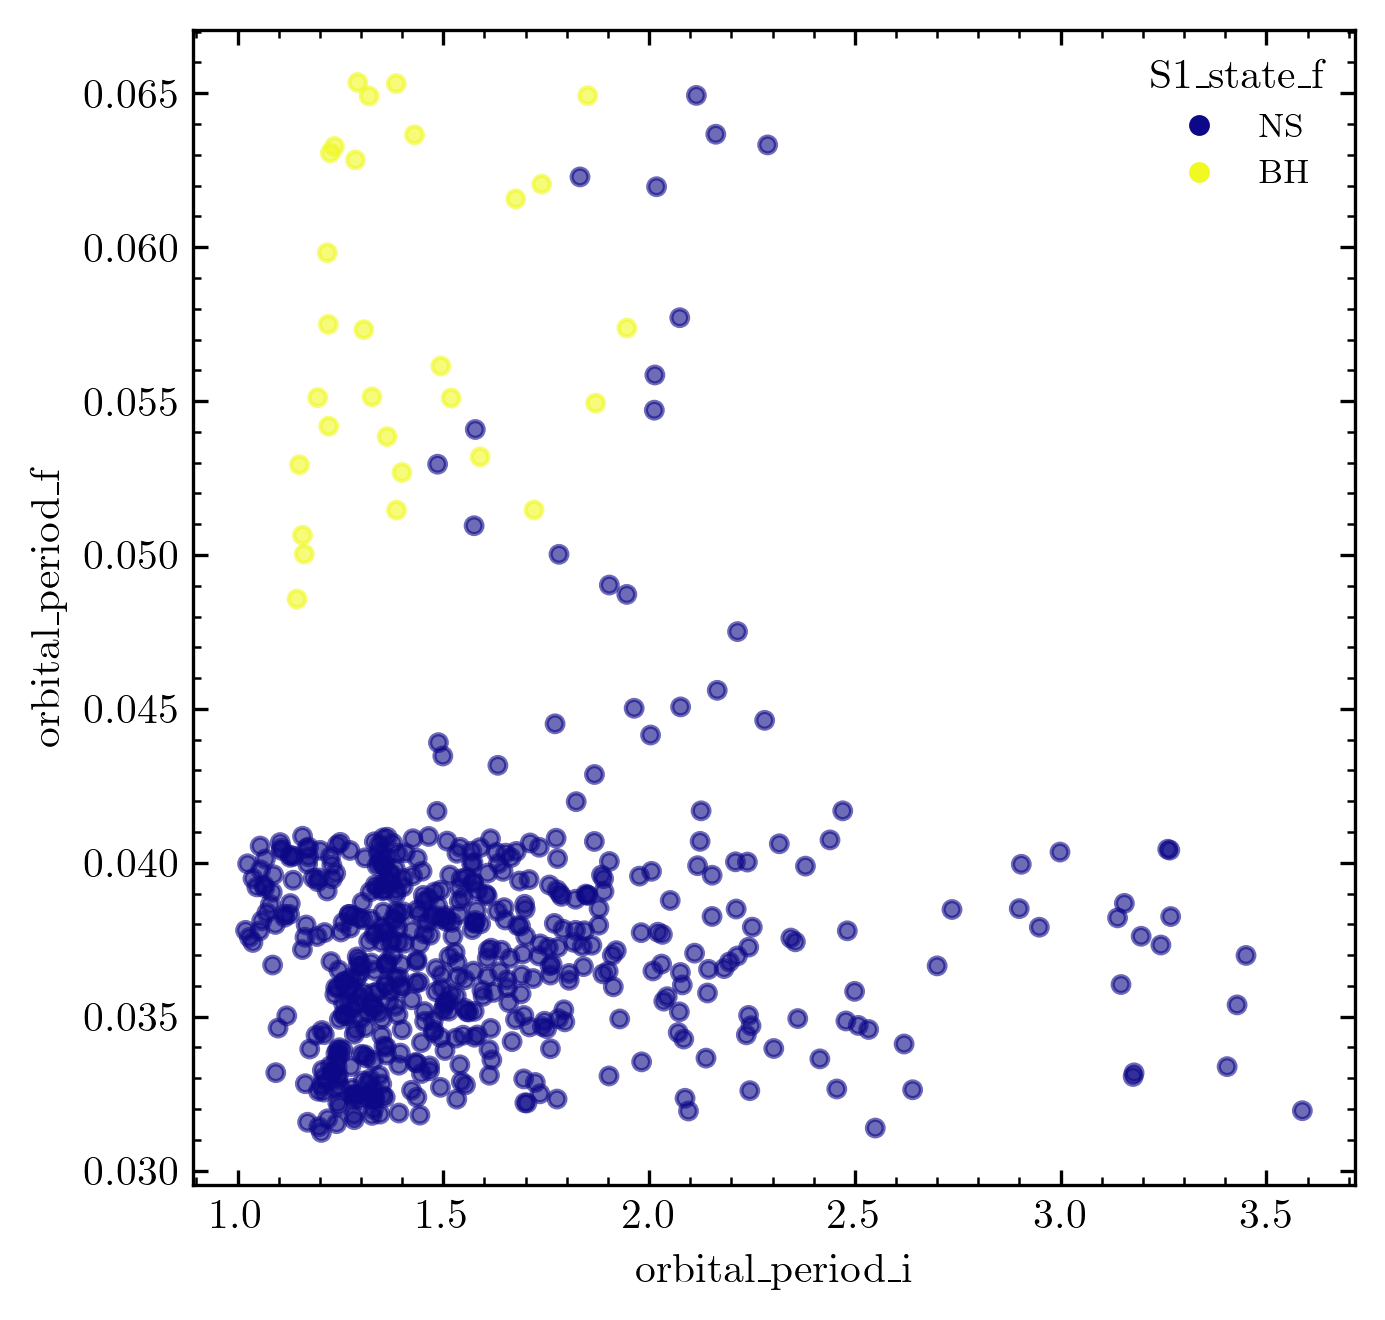

In [ ]:
scatter('orbital_period_i', 'orbital_period_f', old=False, color = True, colorVar='S1_state_f', logX=True)

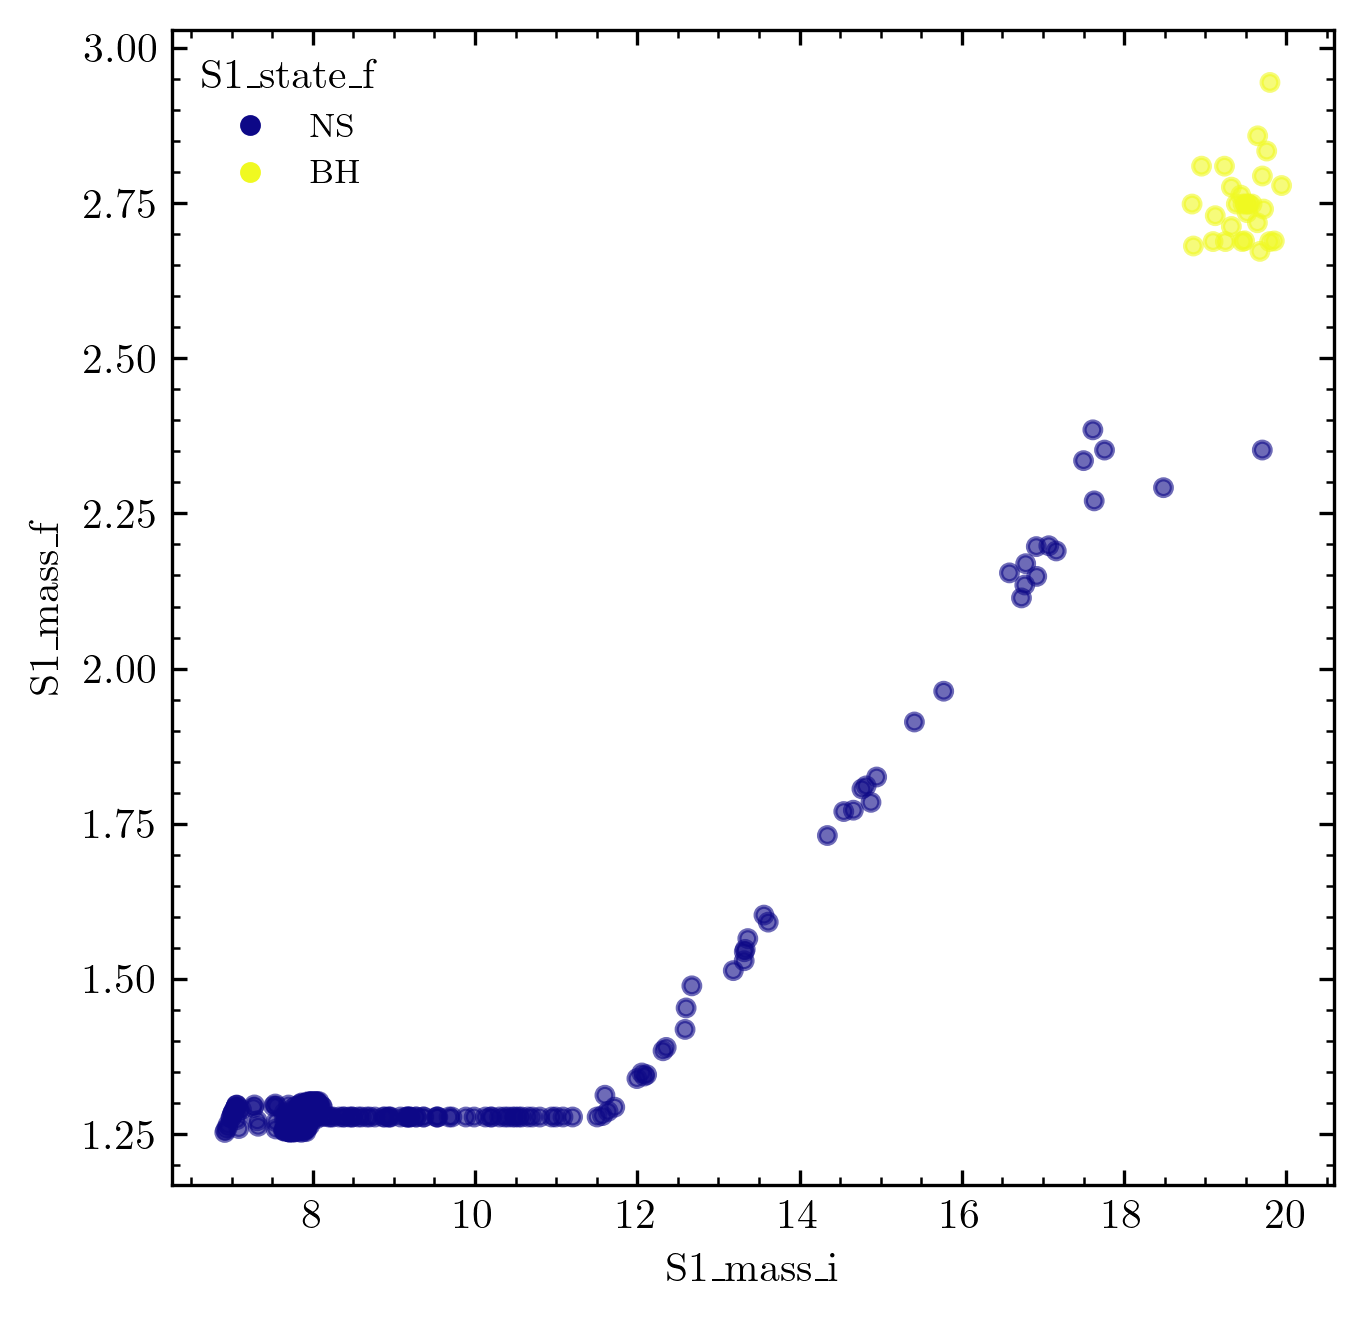

In [ ]:
scatter('S1_mass_i', 'S1_mass_f', old=False, colorVar='S1_state_f', color = True)

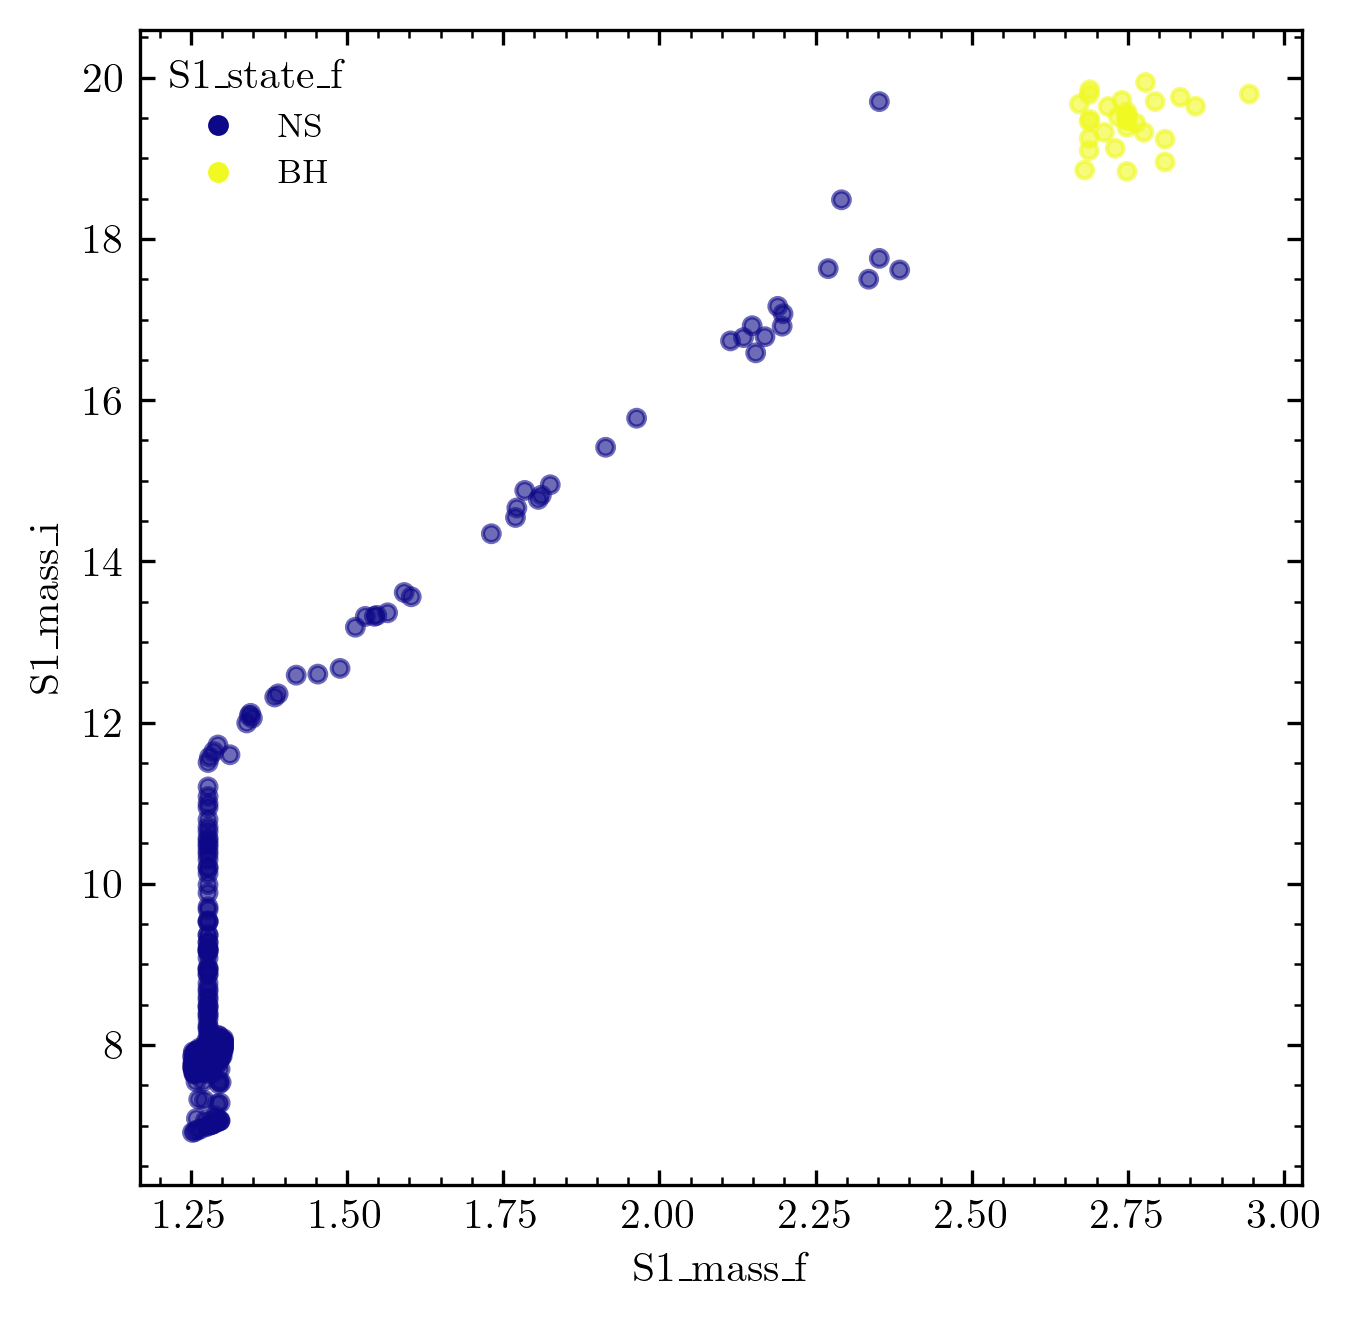

In [ ]:
scatter('S1_mass_f', 'S1_mass_i', old=False, colorVar='S1_state_f', color = True)

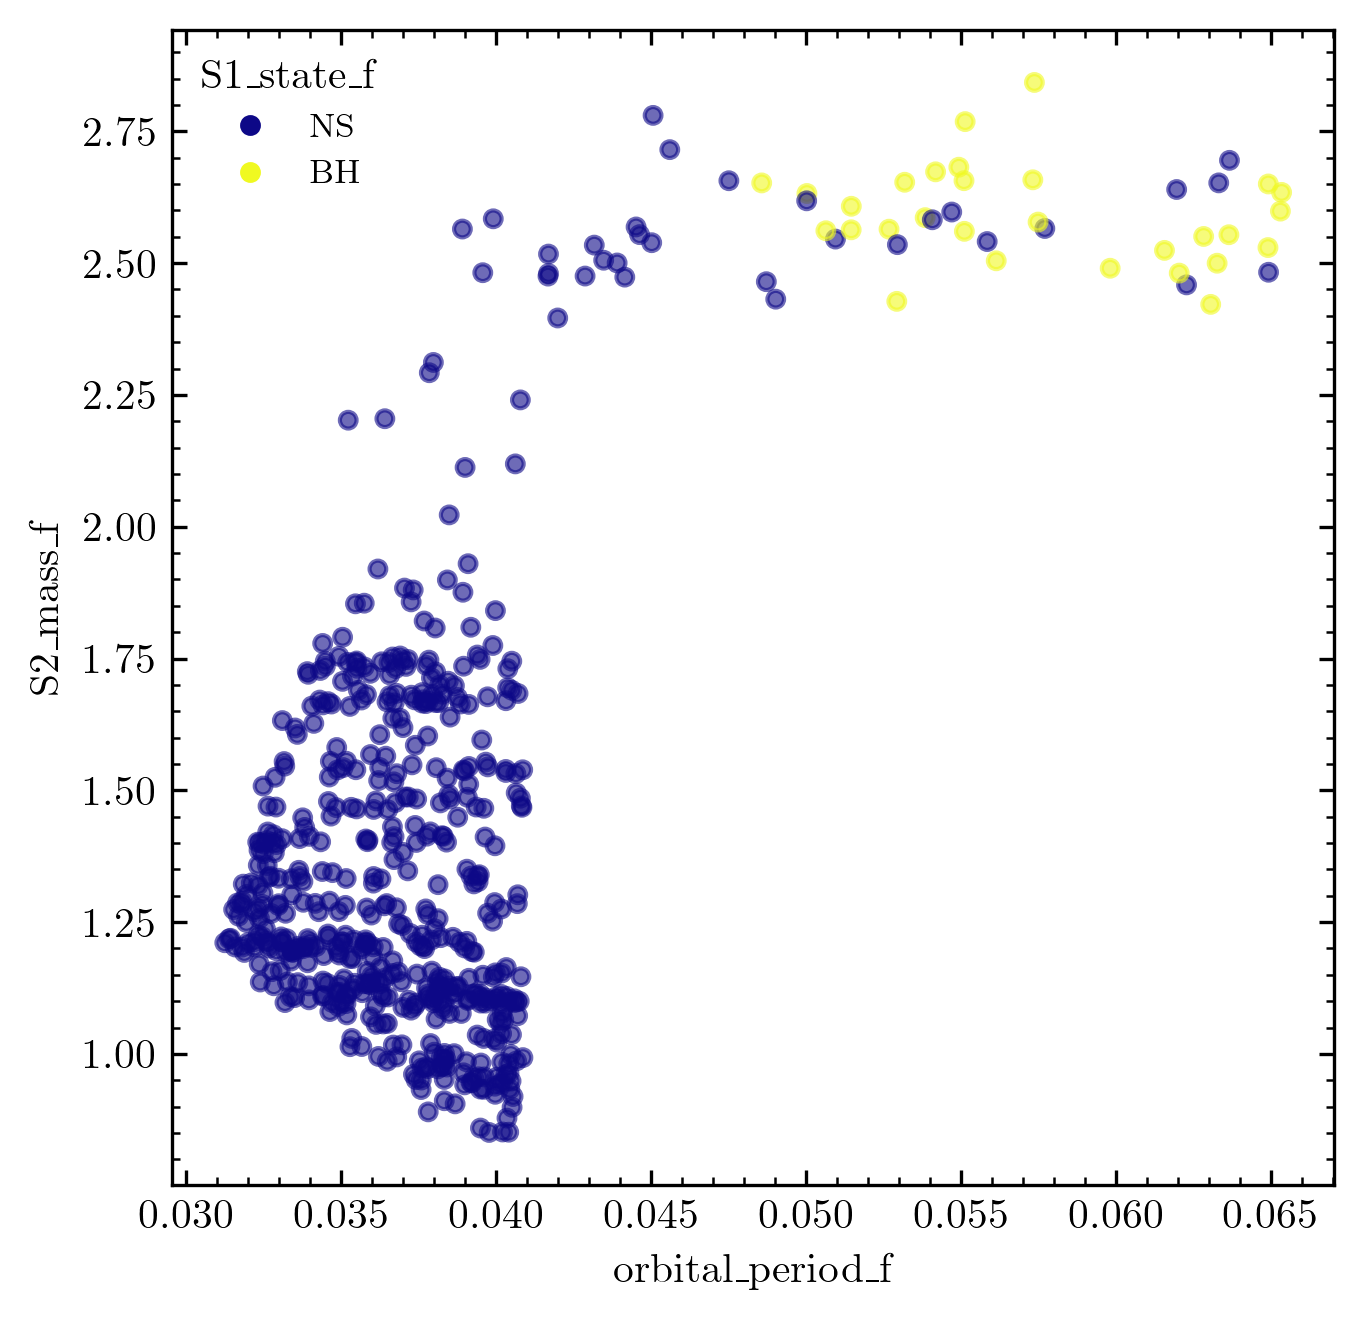

In [ ]:
scatter('orbital_period_f', 'S2_mass_f', old=False, colorVar='S1_state_f', color = True, logY=False)

(array([12., 26., 33., 29., 28., 37., 38., 42., 37., 51., 46., 41., 41.,
        47.,  5.,  4.,  0.,  3.,  2.,  2.,  2.,  1.,  0.,  1.,  0.,  2.,
         1.,  2.,  2.,  2.,  0.,  3.,  1.,  3.,  4.,  1.,  2.,  0.,  4.,
         0.,  0.,  1.,  0.,  0.,  1.,  3.,  3.,  3.,  0.,  5.]),
 array([0.03123891, 0.03192117, 0.03260342, 0.03328568, 0.03396793,
        0.03465019, 0.03533244, 0.0360147 , 0.03669695, 0.03737921,
        0.03806146, 0.03874372, 0.03942597, 0.04010822, 0.04079048,
        0.04147273, 0.04215499, 0.04283724, 0.0435195 , 0.04420175,
        0.04488401, 0.04556626, 0.04624852, 0.04693077, 0.04761303,
        0.04829528, 0.04897754, 0.04965979, 0.05034204, 0.0510243 ,
        0.05170655, 0.05238881, 0.05307106, 0.05375332, 0.05443557,
        0.05511783, 0.05580008, 0.05648234, 0.05716459, 0.05784685,
        0.0585291 , 0.05921136, 0.05989361, 0.06057586, 0.06125812,
        0.06194037, 0.06262263, 0.06330488, 0.06398714, 0.06466939,
        0.06535165]),
 <BarContainer

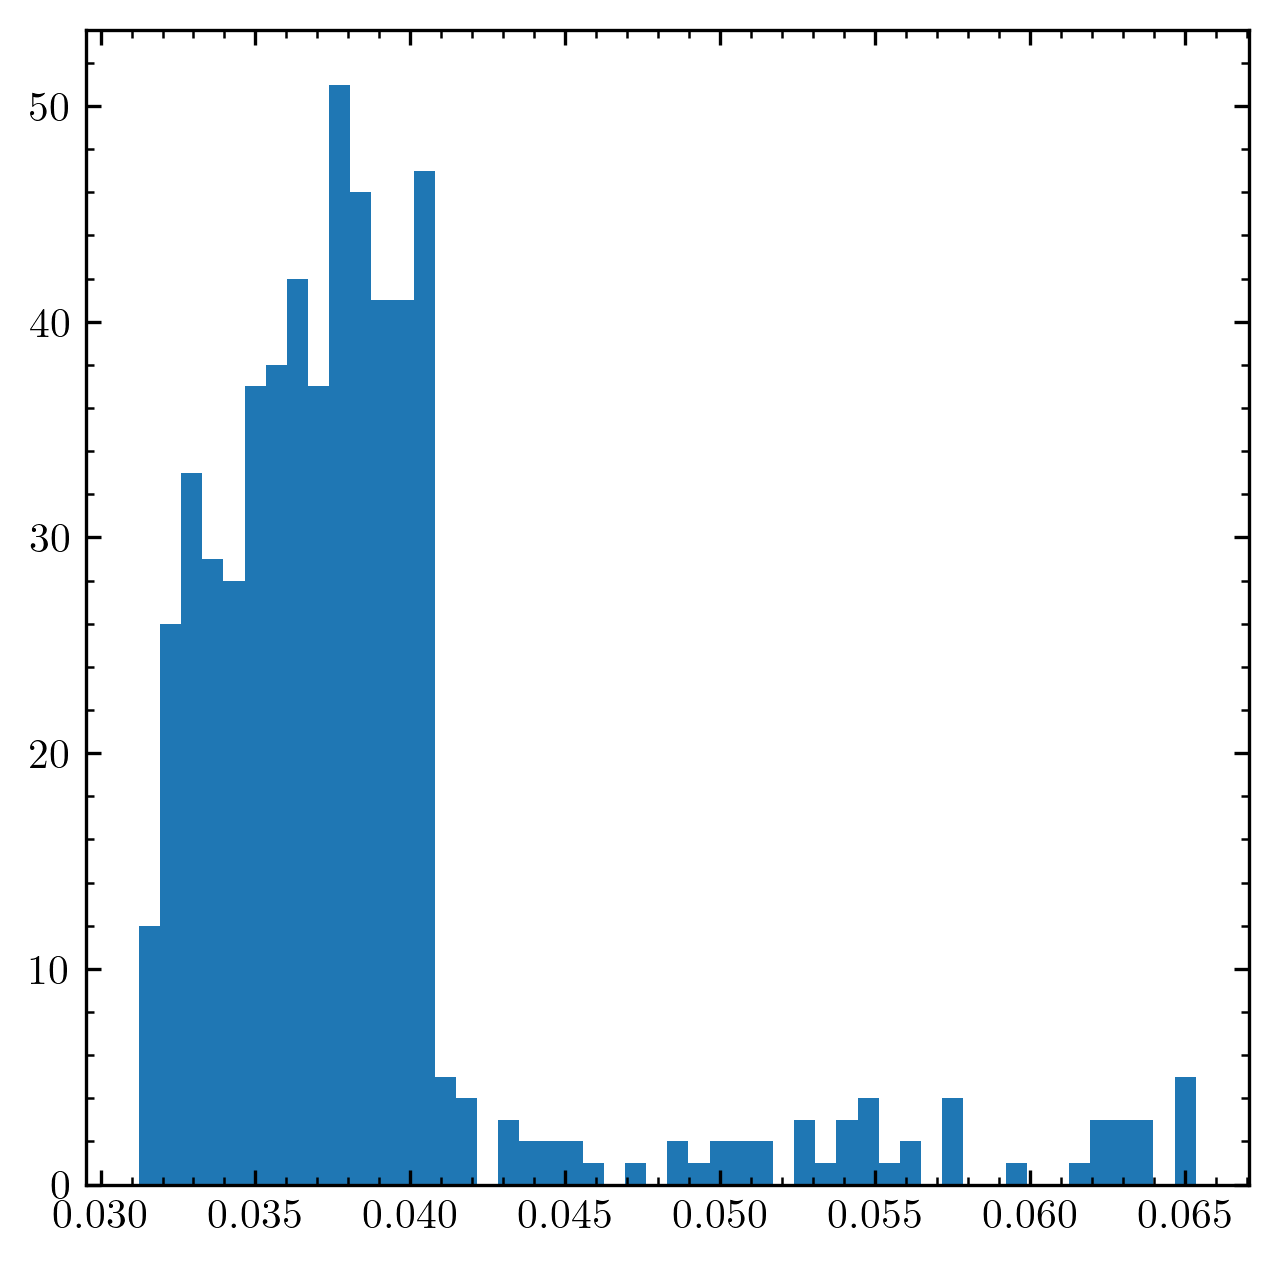

In [ ]:
plt.hist(UCXB_DF['orbital_period_f'], bins = 50)

(array([ 2.,  6.,  6.,  9., 17., 20., 14., 23., 38., 40., 46., 45., 18.,
        26., 25., 15., 15.,  8., 11., 14., 12., 11., 20., 19., 21., 17.,
         6.,  2.,  4.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,
         2.,  0.,  2.,  2.,  6.,  5.,  8.,  7.,  7.,  5., 10.]),
 array([4.9417848 , 5.04239395, 5.1430031 , 5.24361225, 5.34422139,
        5.44483054, 5.54543969, 5.64604884, 5.74665799, 5.84726714,
        5.94787629, 6.04848544, 6.14909459, 6.24970373, 6.35031288,
        6.45092203, 6.55153118, 6.65214033, 6.75274948, 6.85335863,
        6.95396778, 7.05457692, 7.15518607, 7.25579522, 7.35640437,
        7.45701352, 7.55762267, 7.65823182, 7.75884097, 7.85945012,
        7.96005926, 8.06066841, 8.16127756, 8.26188671, 8.36249586,
        8.46310501, 8.56371416, 8.66432331, 8.76493245, 8.8655416 ,
        8.96615075, 9.0667599 , 9.16736905, 9.2679782 , 9.36858735,
        9.4691965 , 9.56980565, 9.67041479, 9.77102394, 9.87163309,
        9.97224224]),
 <BarContainer

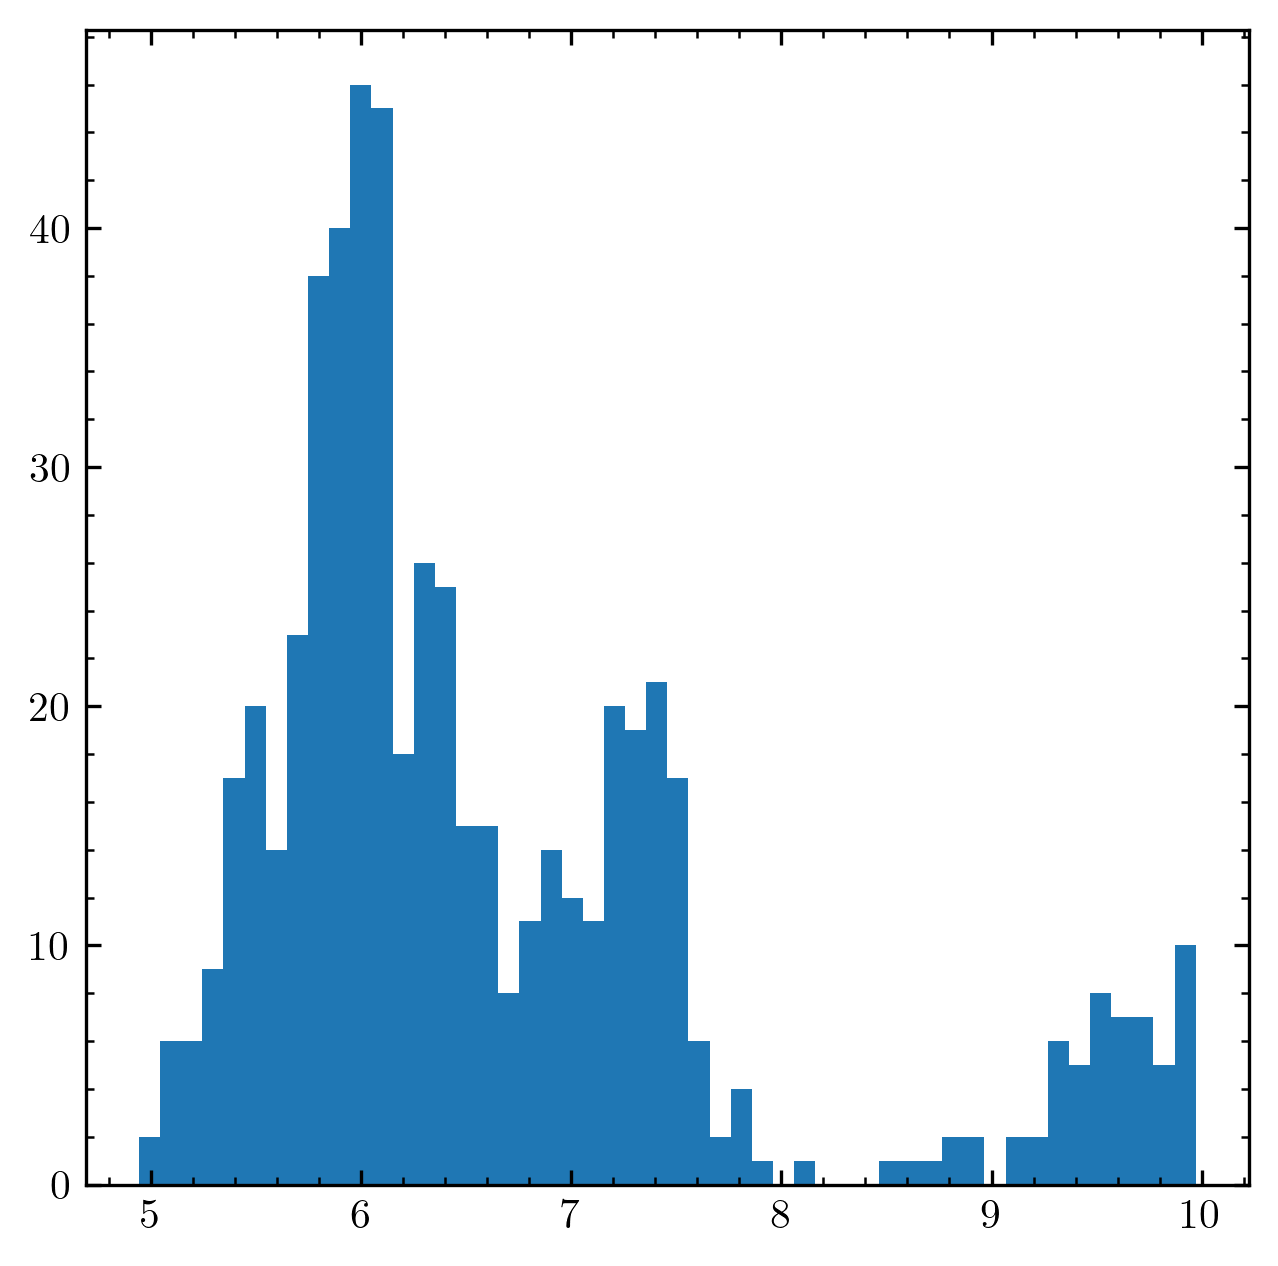

In [ ]:
plt.hist(UCXB_DF['S2_mass_i'], bins = 50)

(array([ 6.,  5., 22., 24., 12., 17., 61., 35., 38., 35., 31., 14., 19.,
        20., 13., 23.,  9., 22.,  6.,  7., 29., 15., 23.,  3.,  4.,  6.,
         2.,  1.,  0.,  1.,  0.,  2.,  0.,  2.,  1.,  0.,  2.,  0.,  1.,
         3.,  9.,  6., 13., 10.,  5.,  9.,  2.,  0.,  2.,  1.]),
 array([0.85100136, 0.89083474, 0.93066811, 0.97050149, 1.01033486,
        1.05016824, 1.09000161, 1.12983499, 1.16966837, 1.20950174,
        1.24933512, 1.28916849, 1.32900187, 1.36883525, 1.40866862,
        1.448502  , 1.48833537, 1.52816875, 1.56800212, 1.6078355 ,
        1.64766888, 1.68750225, 1.72733563, 1.767169  , 1.80700238,
        1.84683576, 1.88666913, 1.92650251, 1.96633588, 2.00616926,
        2.04600263, 2.08583601, 2.12566939, 2.16550276, 2.20533614,
        2.24516951, 2.28500289, 2.32483627, 2.36466964, 2.40450302,
        2.44433639, 2.48416977, 2.52400314, 2.56383652, 2.6036699 ,
        2.64350327, 2.68333665, 2.72317002, 2.7630034 , 2.80283677,
        2.84267015]),
 <BarContainer

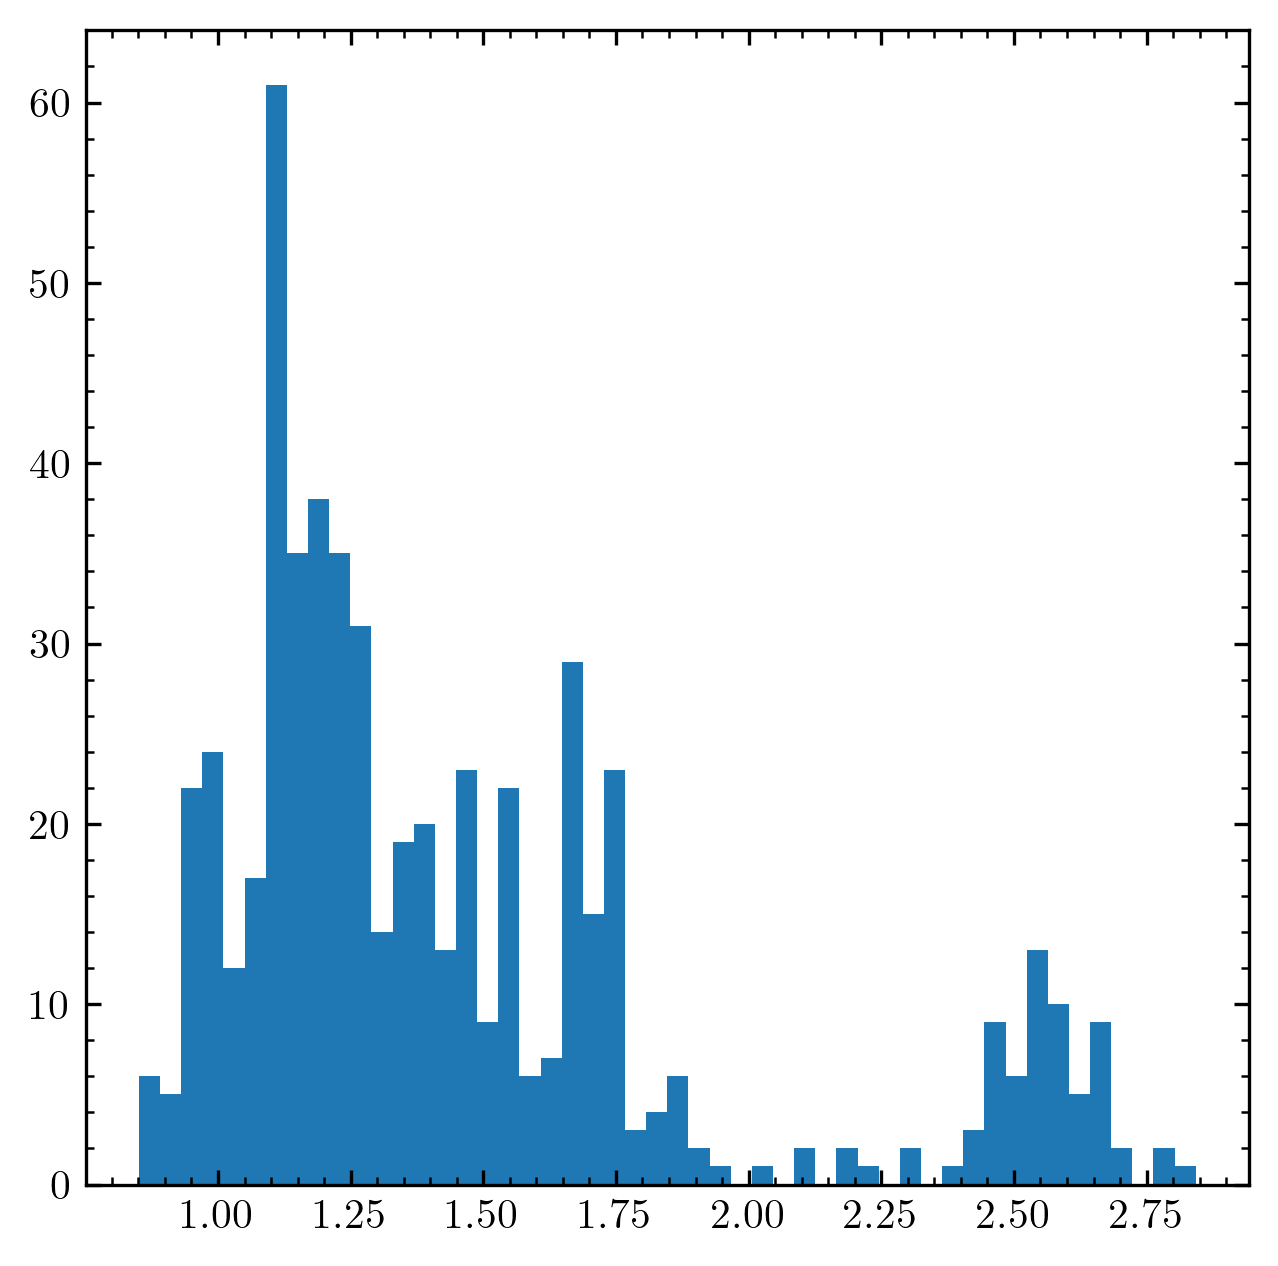

In [ ]:
plt.hist(UCXB_DF['S2_mass_f'], bins = 50)

In [32]:
oldPopDF['S2_state_f'].unique()

array(['stripped_He_Core_He_burning', 'stripped_He_Central_He_depleted',
       'WD'], dtype=object)

In [33]:
UCXB_DF['S2_state_f'].unique()

array(['stripped_He_non_burning'], dtype=object)